# Making business decisions based on data

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results. 

## importing libraries and data:

In [1]:
import pandas as pd
import numpy as np
import math as mth
import sidetable as stb
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
try:
    
    hypotheses = pd.read_csv('\\Users\\aviv\\Downloads\\practicum100\\hypotheses_us.csv', sep=';')

    orders = pd.read_csv('\\Users\\aviv\\Downloads\\practicum100\\orders_us.csv', sep=',', parse_dates=['date'])

    visits = pd.read_csv('\\Users\\aviv\\Downloads\\practicum100\\visits_us.csv', sep=',', parse_dates=['date'])
    
except:
    
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

    orders = pd.read_csv('/datasets/orders_us.csv', sep=',', parse_dates=['date'])

    visits = pd.read_csv('/datasets/visits_us.csv', sep=',', parse_dates=['date'])
    
df_list = [hypotheses, orders, visits]

# Preprocessing


In [5]:
for df in df_list:
    df.columns=df.columns.str.lower()
    print(df.info())
    print(df.head())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1

- hypotheses - list of hypotheses to prioritize, and then test
- orders - dump file with order data
- visits - Server logs with data on visits

checking for weird values:

In [6]:
for df in df_list:
    
    for column in df.columns:
        print(df[column].value_counts())

Add two new channels for attracting traffic. This will bring 30% more users                                               1
Launch your own delivery service. This will shorten delivery time                                                         1
Add product recommendation blocks to the store's site. This will increase conversion and average purchase size            1
Change the category structure. This will increase conversion since users will find the products they want more quickly    1
Change the background color on the main page. This will increase user engagement                                          1
Add a customer review page. This will increase the number of orders                                                       1
Show banners with current offers and sales on the main page. This will boost conversion                                   1
Add a subscription form to all the main pages. This will help you compile a mailing list                                  1
Launch a

checking for members in both A and B:
grouping by visitorid (only if they have more than one entry, otherwise there's not point)
checking whether they have multiple group values, converting the series to list, than slicing the dataframe by this list and checking again for members with multiple group values.

In [7]:
visitors_groups=orders[orders[['visitorid']].duplicated()].groupby(['visitorid'])['group'].unique().reset_index()
visitors_groups.columns = ['visitorid','group_list']
visitors_groups['length'] = visitors_groups['group_list'].transform(lambda x: len(x))
no_good = visitors_groups[visitors_groups['length'] > 1]['visitorid']
no_good = no_good.to_list()

In [8]:
df = orders
orders = df.query("visitorid not in @no_good")




In [9]:

visitors_groups=orders[orders[['visitorid']].duplicated()].groupby(['visitorid'])['group'].unique().reset_index()
visitors_groups.columns = ['visitorid','group_list']
visitors_groups['length'] = visitors_groups['group_list'].transform(lambda x: len(x))
no_good = visitors_groups[visitors_groups['length'] > 1]['visitorid']
no_good

Series([], Name: visitorid, dtype: int64)

if the visits dataframe had user data i would check it for the errors same as above, but it's irrelevant since there's only data on date, group and number of visits

In [10]:
#
#visitors_groups=visits[visits['visitorid'].duplicated()].groupby(['visitorid'])['group'].unique().reset_index()
#visitors_groups.columns = ['visitorid','group_list']
#visitors_groups['length'] = visitors_groups['group_list'].transform(lambda x: len(x))
#no_good = visitors_groups[visitors_groups['length'] > 1]['visitorid']
#no_good = no_good.to_list()

## Missing values

In [11]:
hypotheses.stb.missing(style=True)
orders.stb.missing(style=True)
visits.stb.missing(style=True)

,missing,total,percent
date,0,62,0.00%
group,0,62,0.00%
visits,0,62,0.00%


no missing values

## Duplicates

In [12]:
for df in df_list:
    print(df.duplicated().value_counts())

False    9
dtype: int64
False    1197
dtype: int64
False    62
dtype: int64


no duplicates

# Prioritizing hypotheses

In [13]:
data = hypotheses
data['ICE'] = data['impact']*data['confidence']/data['effort']
data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [14]:
data = hypotheses
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['effort']

data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


we see when we consider the reach parameter, we get 4 other hypotheses prioritized over hypothesis number 8 'launching a promotion..'
the only difference between the two frameworks is the reach, so we can conclude those 4 hypotheses that beat hypothesis number 8 are beating it by reach parameter.

In [15]:
data[['hypothesis','reach']].sort_values(by='reach',ascending = False)

,hypothesis,reach
7,Add a subscription form to all the main pages....,10
2,Add product recommendation blocks to the store...,8
3,Change the category structure. This will incre...,8
6,Show banners with current offers and sales on ...,5
0,Add two new channels for attracting traffic. T...,3
4,Change the background color on the main page. ...,3
5,Add a customer review page. This will increase...,3
1,Launch your own delivery service. This will sh...,2
8,Launch a promotion that gives users discounts ...,1


we see hypothesis number 8 really is the lowest in reach parameter.

# A/B test analysis

## Graph cumulative revenue by group

dividing the groups in the orders and visits dataframes, and grouping by dates to graph.

In [16]:
a_orders = orders.query("group == 'A'")
a_orders.head()
b_orders = orders.query("group == 'B'")
b_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [17]:
a_visits = visits.query("group == 'A'")
a_visits.head()
b_visits = visits.query("group == 'B'")
b_visits.head()

,date,group,visits
31,2019-08-01,B,713
32,2019-08-02,B,581
33,2019-08-03,B,509
34,2019-08-04,B,770
35,2019-08-05,B,707


In [18]:
a_orders_grouped = a_orders.groupby('date').agg({'revenue':'sum', 'transactionid':'count'}).reset_index()
a_orders_grouped.head()

,date,revenue,transactionid
0,2019-08-01,2266.6,23
1,2019-08-02,1503.5,20
2,2019-08-03,1815.2,24
3,2019-08-04,990.6,12
4,2019-08-05,1988.1,25


In [19]:
a_orders_grouped['cumul_rev']=a_orders_grouped['revenue'].cumsum()
a_orders_grouped.head()

,date,revenue,transactionid,cumul_rev
0,2019-08-01,2266.6,23,2266.6
1,2019-08-02,1503.5,20,3770.1
2,2019-08-03,1815.2,24,5585.3
3,2019-08-04,990.6,12,6575.9
4,2019-08-05,1988.1,25,8564.0


In [20]:
b_orders_grouped = b_orders.groupby('date').agg({'revenue':'sum', 'transactionid':'count'}).reset_index()
b_orders_grouped.head()
b_orders_grouped['cumul_rev']=b_orders_grouped['revenue'].cumsum()
b_orders_grouped.head()

,date,revenue,transactionid,cumul_rev
0,2019-08-01,1258.8,19,1258.8
1,2019-08-02,2568.1,23,3826.9
2,2019-08-03,1386.7,15,5213.6
3,2019-08-04,1661.8,15,6875.4
4,2019-08-05,1454.8,22,8330.2


Text(0, 0.5, 'revenue in currency')

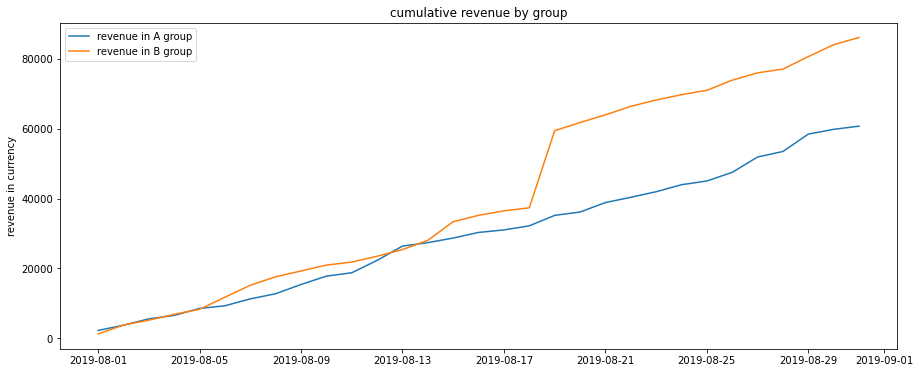

In [21]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(a_orders_grouped['date'], a_orders_grouped['cumul_rev'], label='revenue in A group')
plt.plot(b_orders_grouped['date'], b_orders_grouped['cumul_rev'], label='revenue in B group')
plt.legend()
plt.title("cumulative revenue by group")
plt.ylabel("revenue in currency")

looks like the revenues were pretty close, then B got the lead, a little tie between and then B won by a landslide.
in my eyes it could've been one big purchase that got B group the win, we'll have to check for outliers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Very nice data visualization.

It is a matter of taste, but you can also use `plt.grid()` to add grid to your graph and rotate x-axis ticks.

## Graph cumulative average order size by group

revenue by number of purchases.

In [22]:
a_orders_grouped['cumul_purch']=a_orders_grouped['transactionid'].cumsum()
a_orders_grouped.head()

,date,revenue,transactionid,cumul_rev,cumul_purch
0,2019-08-01,2266.6,23,2266.6,23
1,2019-08-02,1503.5,20,3770.1,43
2,2019-08-03,1815.2,24,5585.3,67
3,2019-08-04,990.6,12,6575.9,79
4,2019-08-05,1988.1,25,8564.0,104


In [23]:
b_orders_grouped['cumul_purch']=b_orders_grouped['transactionid'].cumsum()
b_orders_grouped.head()

,date,revenue,transactionid,cumul_rev,cumul_purch
0,2019-08-01,1258.8,19,1258.8,19
1,2019-08-02,2568.1,23,3826.9,42
2,2019-08-03,1386.7,15,5213.6,57
3,2019-08-04,1661.8,15,6875.4,72
4,2019-08-05,1454.8,22,8330.2,94


In [24]:
a_orders_grouped['cumul_avch']=a_orders_grouped['cumul_rev']/a_orders_grouped['cumul_purch']
a_orders_grouped.head()

,date,revenue,transactionid,cumul_rev,cumul_purch,cumul_avch
0,2019-08-01,2266.6,23,2266.6,23,98.547826
1,2019-08-02,1503.5,20,3770.1,43,87.676744
2,2019-08-03,1815.2,24,5585.3,67,83.362687
3,2019-08-04,990.6,12,6575.9,79,83.239241
4,2019-08-05,1988.1,25,8564.0,104,82.346154


In [25]:
b_orders_grouped['cumul_avch']=b_orders_grouped['cumul_rev']/b_orders_grouped['cumul_purch']
b_orders_grouped.head()

,date,revenue,transactionid,cumul_rev,cumul_purch,cumul_avch
0,2019-08-01,1258.8,19,1258.8,19,66.252632
1,2019-08-02,2568.1,23,3826.9,42,91.116667
2,2019-08-03,1386.7,15,5213.6,57,91.466667
3,2019-08-04,1661.8,15,6875.4,72,95.491667
4,2019-08-05,1454.8,22,8330.2,94,88.619149


Text(0.5, 1.0, 'cumulative average order size by group')

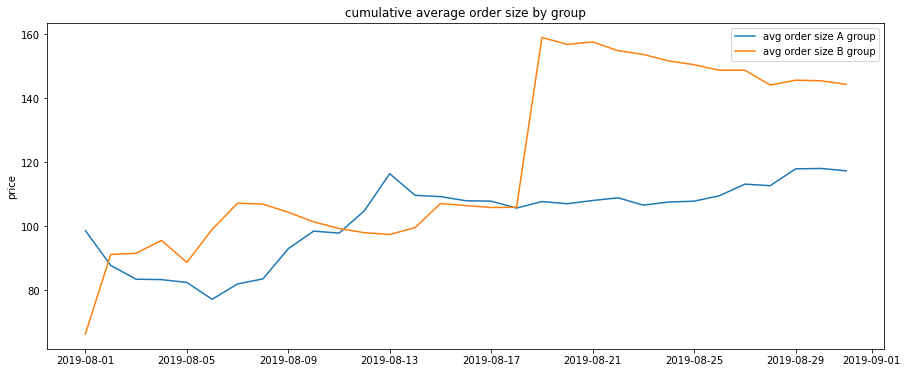

In [26]:
plt.plot(a_orders_grouped['date'], a_orders_grouped['cumul_avch'], label='avg order size A group')
plt.plot(b_orders_grouped['date'], b_orders_grouped['cumul_avch'], label='avg order size B group')
plt.legend()
plt.ylabel('price')
plt.title("cumulative average order size by group")

we can see the same bump that won the B group revenue here, increasing the avg order size, and same overall behaviour.
the bump could still be attributed to outliers.

## Graph relative difference in cumulative average order size for group B compared with group A

Text(0.5, 1.0, 'relative difference in cumulative average order size (b compared to a)')

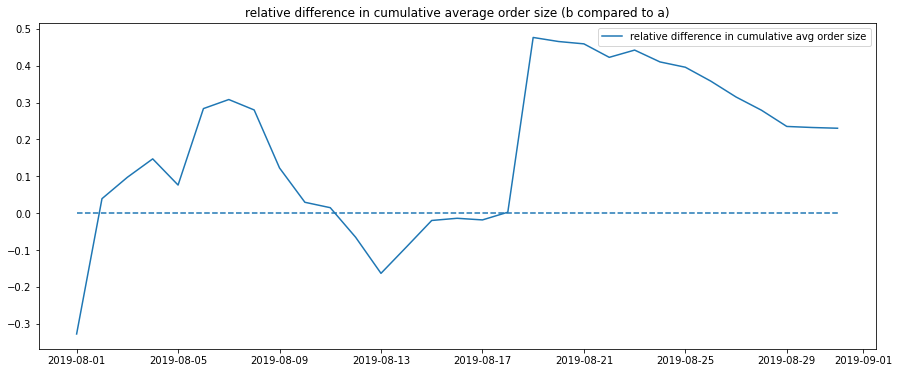

In [27]:
plt.plot(b_orders_grouped['date'], (b_orders_grouped['cumul_avch']/a_orders_grouped['cumul_avch'] - 1), label='relative difference in cumulative avg order size')
plt.hlines(y=0, xmin=b_orders_grouped['date'].min() , xmax=b_orders_grouped['date'].max(), linestyles= 'dashed')
plt.legend()
plt.title("relative difference in cumulative average order size (b compared to a)")

like we saw in the revenue graph, it took some time for B group to grab the lead. looks as though it would stabilize around a tie in august if it weren't for the big bump we talked about.

## Calculate and plot each group's conversion rate (daily orders/daily visits)

Describe the difference

we'll join the visits dataframe to our grouped dataframes on dates, that way we can add a conversion column.

In [28]:
a_orders_grouped = a_orders_grouped.merge(a_visits, on='date',how='left')
a_orders_grouped.rename(columns = {'transactionid':'transactions'}, inplace = True)
a_orders_grouped.head()

,date,revenue,transactions,cumul_rev,cumul_purch,cumul_avch,group,visits
0,2019-08-01,2266.6,23,2266.6,23,98.547826,A,719
1,2019-08-02,1503.5,20,3770.1,43,87.676744,A,619
2,2019-08-03,1815.2,24,5585.3,67,83.362687,A,507
3,2019-08-04,990.6,12,6575.9,79,83.239241,A,717
4,2019-08-05,1988.1,25,8564.0,104,82.346154,A,756


In [29]:
a_orders_grouped['daily_conversion'] = a_orders_grouped['transactions'] / a_orders_grouped['visits']
a_orders_grouped['cum_trans'] = a_orders_grouped['transactions'].cumsum()
a_orders_grouped['cum_visits'] = a_orders_grouped['visits'].cumsum()
a_orders_grouped['cum_conversion'] = a_orders_grouped['cum_trans'] / a_orders_grouped['visits']
a_orders_grouped.head()

,date,revenue,transactions,cumul_rev,cumul_purch,cumul_avch,group,visits,daily_conversion,cum_trans,cum_visits,cum_conversion
0,2019-08-01,2266.6,23,2266.6,23,98.547826,A,719,0.031989,23,719,0.031989
1,2019-08-02,1503.5,20,3770.1,43,87.676744,A,619,0.032310,43,1338,0.069467
2,2019-08-03,1815.2,24,5585.3,67,83.362687,A,507,0.047337,67,1845,0.132150
3,2019-08-04,990.6,12,6575.9,79,83.239241,A,717,0.016736,79,2562,0.110181
4,2019-08-05,1988.1,25,8564.0,104,82.346154,A,756,0.033069,104,3318,0.137566


In [30]:
b_orders_grouped = b_orders_grouped.merge(b_visits, on='date',how='left')
b_orders_grouped.rename(columns = {'transactionid':'transactions'}, inplace = True)
b_orders_grouped.head()

,date,revenue,transactions,cumul_rev,cumul_purch,cumul_avch,group,visits
0,2019-08-01,1258.8,19,1258.8,19,66.252632,B,713
1,2019-08-02,2568.1,23,3826.9,42,91.116667,B,581
2,2019-08-03,1386.7,15,5213.6,57,91.466667,B,509
3,2019-08-04,1661.8,15,6875.4,72,95.491667,B,770
4,2019-08-05,1454.8,22,8330.2,94,88.619149,B,707


In [31]:
b_orders_grouped['daily_conversion'] = b_orders_grouped['transactions'] / b_orders_grouped['visits']
b_orders_grouped['cum_trans'] = b_orders_grouped['transactions'].cumsum()
b_orders_grouped['cum_visits'] = b_orders_grouped['visits'].cumsum()
b_orders_grouped['cum_conversion'] = b_orders_grouped['cum_trans'] / b_orders_grouped['visits']
b_orders_grouped.head()

,date,revenue,transactions,cumul_rev,cumul_purch,cumul_avch,group,visits,daily_conversion,cum_trans,cum_visits,cum_conversion
0,2019-08-01,1258.8,19,1258.8,19,66.252632,B,713,0.026648,19,713,0.026648
1,2019-08-02,2568.1,23,3826.9,42,91.116667,B,581,0.039587,42,1294,0.072289
2,2019-08-03,1386.7,15,5213.6,57,91.466667,B,509,0.029470,57,1803,0.111984
3,2019-08-04,1661.8,15,6875.4,72,95.491667,B,770,0.019481,72,2573,0.093506
4,2019-08-05,1454.8,22,8330.2,94,88.619149,B,707,0.031117,94,3280,0.132956


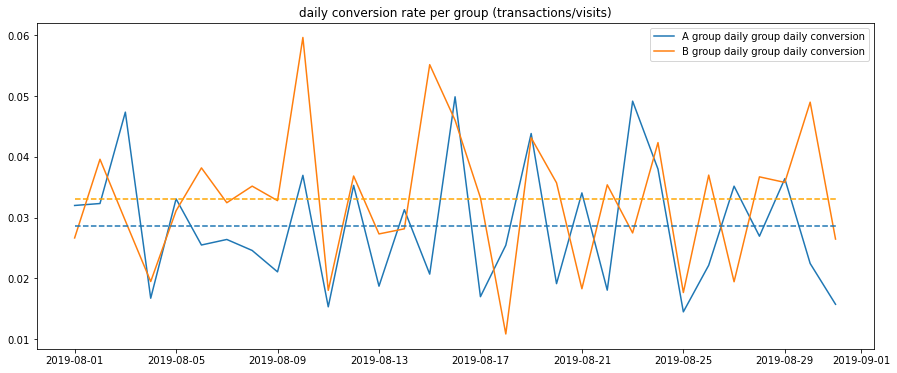

In [32]:
plt.plot(a_orders_grouped['date'], a_orders_grouped['daily_conversion'], label='A group daily group daily conversion')
plt.plot(b_orders_grouped['date'], b_orders_grouped['daily_conversion'], label='B group daily group daily conversion')
plt.legend()
plt.title("daily conversion rate per group (transactions/visits)")
plt.hlines(y=a_orders_grouped['daily_conversion'].mean(), xmin=b_orders_grouped['date'].min() , xmax=b_orders_grouped['date'].max(), linestyles= 'dashed',)
plt.hlines(y=b_orders_grouped['daily_conversion'].mean(), xmin=b_orders_grouped['date'].min() , xmax=b_orders_grouped['date'].max(), linestyles= 'dashed', colors='orange')

we see an overall similar conversion behavior although the average daily conversion is higher for B group. even at the peaks which almost overlap, most of the times B group conversion reaches higher.

Text(0.5, 1.0, 'cumulative conversion rate per group (cumulative transactions/cumulative visits)')

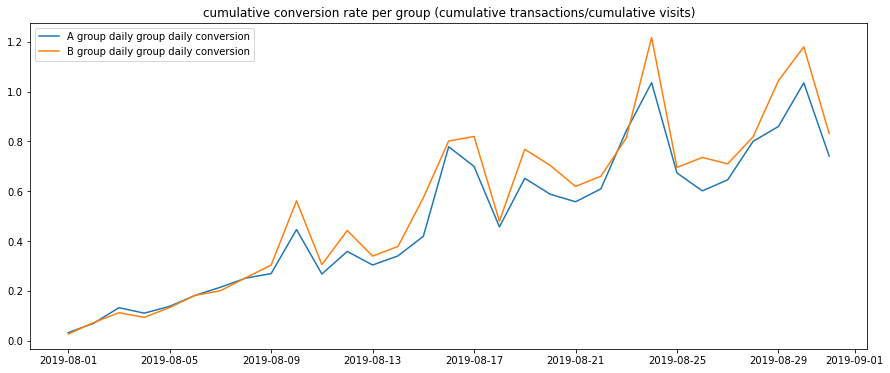

In [33]:
plt.plot(a_orders_grouped['date'], a_orders_grouped['cum_conversion'], label='A group daily group daily conversion')
plt.plot(b_orders_grouped['date'], b_orders_grouped['cum_conversion'], label='B group daily group daily conversion')
plt.legend()
plt.title("cumulative conversion rate per group (cumulative transactions/cumulative visits)")

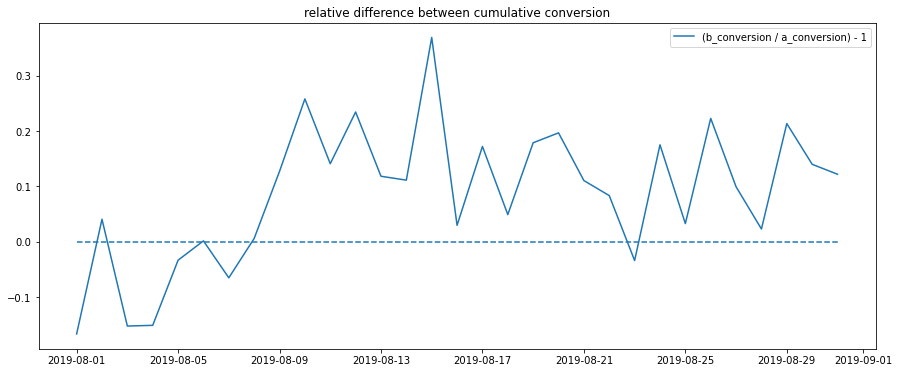

In [34]:
plt.plot(b_orders_grouped['date'], ((b_orders_grouped['cum_conversion']/a_orders_grouped['cum_conversion'])-1), label='(b_conversion / a_conversion) - 1')
plt.legend()
plt.title('relative difference between cumulative conversion')
plt.hlines(y=0, xmin=b_orders_grouped['date'].min() , xmax=b_orders_grouped['date'].max(), linestyles= 'dashed',)

we see group b took the lead early on, with a little dip, but stabilized above group a.

## Plot scatter chart of the number of order per user


grouping and counting purchases by user, creating a range for the plot using 
x_values = pd.Series(range(0,len(ordersByUsers)))


In [35]:
a_orders_group = (
    a_orders.drop(['group','revenue','date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
#a_orders_group['revenue'].value_counts()
a_orders_group.sort_values(by='transactionid', ascending=False).head(10)

,visitorid,transactionid
22,237748145,4
185,1614305549,3
66,611059232,3
339,2988190573,3
231,2108163459,3
443,3908431265,3
454,3967698036,3
328,2892265953,2
197,1772171838,2
247,2232111114,2


In [36]:
x_values = pd.Series(range(0,len(a_orders_group)))

Text(0, 0.5, 'no. of orders')

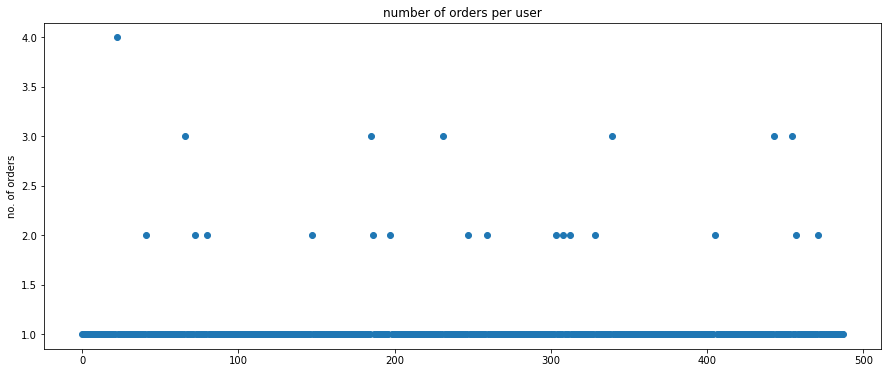

In [37]:
plt.scatter(x_values, a_orders_group['transactionid'])
plt.title("number of orders per user")
plt.ylabel('no. of orders')

we see the strong majority of users order 1 time, with a few that order 2, and fewer as we go up to 4 orders. in the span of one month that makes sense, as a paycheck comes once a month. i'd imagine if people could, they'd buy food once a month.

## Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly

In [38]:
np.percentile(a_orders_group['transactionid'], [ 95, 99])

array([1., 3.])

around 95% of users placed only 1 order and not more than 1% placed more than 3 orders, i'd say 3-4 orders is an anomaly.

## Plot a scatter chart of order prices

Text(0, 0.5, 'no. of orders')

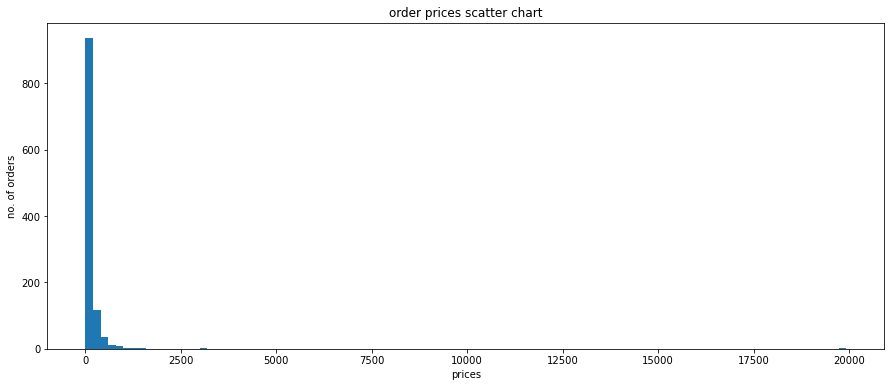

In [39]:
plt.hist(orders['revenue'], bins=100)
plt.title("order prices scatter chart")
plt.xlabel("prices")
plt.ylabel("no. of orders")

we see a right skewed distribution with what i'd clearly call anomalies above the price of 2500.

## Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly

In [40]:
np.percentile(orders['revenue'], [ 95, 99])

array([428.78, 895.23])

so 95% of people placed orders of 428 bucks and below, and only 1% of people placed orders of more than 900 bucks. you could definitely claim orders placed more than 1000$ are anomalies

## Find the statistical significance of the difference in conversion between the groups using the raw data

since we're comparing proportions, we'll use z-test to test our hypothesis:

- H0 - the conversions are the same
- H1 - the conversion are statistically different

In [41]:
a_trials=a_orders_grouped['visits'].sum()
print("Trials:",a_trials)
a_successes=a_orders_grouped['transactions'].sum()
print("Successes:",a_successes)

Trials: 18736
Successes: 518


In [42]:
b_trials=b_orders_grouped['visits'].sum()
print("Trials:",b_trials)
b_successes=b_orders_grouped['transactions'].sum()
print("Successes:",b_successes)

Trials: 18916
Successes: 597


In [43]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([a_successes,b_successes], [a_trials,b_trials])
print('{0:0.3f}'.format(pval))

0.025


p-value is less than 5%, so we can reject the null hypothesis; the difference between the conversion rates is statistically significant.

In [44]:
print("relative difference between conversions is {0:.3f}".format((b_successes/b_trials)/(a_successes/a_trials) - 1)) 

relative difference between conversions is 0.142


## Find the statistical significance of the difference in average order size between the groups using the raw data

since we're comparing averages, we'll use mann-whitney test to test our hypothesis:
- H0 - the average order sizes are the same
- H1 - the average order sizes are statistically different

In [45]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value is {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('relative difference between avg order size is {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value is 0.973
relative difference between avg order size is 0.230


p-value is much greater than 5% so the null hypothesis cannot be rejected, in other words; differences between average order size cannot be considered statistically significant. the relative difference is 2.3%

## Find the statistical significance of the difference in conversion between the groups using the filtered data

since we're comparing proportions, we'll use z-test to test our hypothesis:

- H0 - the conversions are the same
- H1 - the conversion are statistically different

In [46]:
a_orders=orders.query("group=='A'")
a_orders.shape
#before filtering, 518 successes.
a_orders=a_orders.query("revenue<1000")
a_orders.shape
a_orders_grouped = a_orders.groupby('visitorid').agg({'revenue':'sum', 'transactionid':'count'}).reset_index()
print(a_orders_grouped.head())
print(a_orders_grouped.shape)
a_orders_grouped = a_orders_grouped.query("transactionid < 3")
print(a_orders_grouped.head())
print(a_orders_grouped.shape)
#after filtering, 475 successes

   visitorid  revenue  transactionid
0    8300375     30.5              1
1   11685486    100.4              1
2   54447517      5.0              1
3   66685450    125.9              1
4   78758296     20.1              1
(482, 3)
   visitorid  revenue  transactionid
0    8300375     30.5              1
1   11685486    100.4              1
2   54447517      5.0              1
3   66685450    125.9              1
4   78758296     20.1              1
(475, 3)


In [47]:
b_orders=orders.query("group=='B'")
b_orders.shape
#before filtering, 597 successes.
b_orders=b_orders.query("revenue<1000")
b_orders.shape
b_orders_grouped = b_orders.groupby('visitorid').agg({'revenue':'sum', 'transactionid':'count'}).reset_index()
print(b_orders_grouped.head())
print(b_orders_grouped.shape)
b_orders_grouped = b_orders_grouped.query("transactionid < 3")
print(b_orders_grouped.head())
print(b_orders_grouped.shape)
#after filtering, 564 successes

   visitorid  revenue  transactionid
0    5114589     10.8              1
1    6958315     25.9              1
2    8300375    165.7              1
3   39475350     65.4              1
4   47206413     15.2              1
(567, 3)
   visitorid  revenue  transactionid
0    5114589     10.8              1
1    6958315     25.9              1
2    8300375    165.7              1
3   39475350     65.4              1
4   47206413     15.2              1
(564, 3)


In [48]:
initialA, finalA=518, 475
a_trials=visits.query("group=='A'")['visits'].sum() - (initialA-finalA)
print("Trials:",a_trials)
a_successes=a_orders_grouped['transactionid'].sum()
print("Successes:",a_successes)

Trials: 18693
Successes: 490


In [49]:
initialB, finalB=597, 564
b_trials=visits.query("group=='B'")['visits'].sum() - (initialB-finalB)
print("Trials:",b_trials)
b_successes=b_orders_grouped['transactionid'].sum()
print("Successes:",b_successes)

Trials: 18883
Successes: 583


In [50]:
stat, pval = proportions_ztest([a_successes,b_successes], [a_trials,b_trials])
print('p-value is {0:0.3f}'.format(pval))

p-value is 0.007


we see even with the filtered data that the p-value is smaller than 5% therefore, the difference in conversion between the groups is statistically significant.

In [51]:
print("relative difference between conversions is {0:.3f}".format((b_successes/b_trials)/(a_successes/a_trials) - 1)) 

relative difference between conversions is 0.178


now that we've cleaned the data of the anomalies, the p-value for the test is smaller than 5% and we can say the difference between the conversion rates is statistically significant. it's 17.8%!

## Find the statistical significance of the difference in average order size between the groups using the filtered data

since we're comparing averages, we'll use mann-whitney test to test our hypothesis:
- H0 - the average order sizes are the same
- H1 - the average order sizes are statistically different

In [52]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 2500]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

#print("p-value after filtering is {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#print("relative difference between conversions after filtering is {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

print('p-value after filtering is {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('relative difference after filtering is {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value after filtering is 0.568
relative difference after filtering is -0.109


p-value is still large, so we can't say the difference is statistically significant. we did see in the average check plot that the behaviours are similar.

## Make a decision based on the test results
The possible decisions are:
1. Stop the test, consider one of the groups the leader.
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test


since all the parameters we've tested have stabilized based one month of data we should call the test a success and stop it.

# Conclusions

we saw that B group is leading by revenue, avg order size,
cumulative avg order size, and conversion rates.
we also saw that B leading the conversion rates is statistically significant (after filtering the data for anomalies)
so we can consider B group the leader.